<a href="https://colab.research.google.com/github/SiddharthaSamant/KERAS_CNN_PROJECT1/blob/master/KERAS_CNN_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **NEURAL NETWORK MANUAL ENTRY DIGIT RECOGNITION PROJECT**

*MADE BY*-
GAURAV KASHYAP AND SIDDHATHA SAMANT
Birla Institute Technology,Mesra

THIS PROJECT IS BASED ON THE BUILDING OF A NEURAL NETWORK BY TRAINING IT ON THE MNIST DATA WHICH CONSISTS OF 6000 SAMPLES OF TRAINING IMAGE DATA AND 1000 TESTING  IMAGE DATA
  

![alt text](https://drive.google.com/uc?id=14w1RIUt2RkH18cYEmeqHSXXGvoe7zHEr)


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,)


**BEFORE TRAINING OUR MODEL WE NEED TO TURN OUR INPUT DATA INTO A PROCESSABLE FORMAT**

In [2]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#x_train = keras.utils.normalize(x_train, axis = 1)
#x_test = keras.utils.normalize(x_test,axis = 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train,10 )
y_test = keras.utils.to_categorical(y_test,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


** HERE WE BUILD OUR MODEL
    SEQUENTIAL CREATES THE ENVIRONMENT
    ADDING LAYERS IN BETWEEN INPUT AND OUTPUT 
    ACTIVATION FUNCTION IS USED TO INTRODUCE A NON LINEARITY IN  THE        OUTPUT FUNCTION


The term “dropout” refers to dropping out units (both hidden and visible) in a neural network. Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random.

WE ADD 2  HIDDEN LAYERS TO TRAIN OUR MODEL **

In [0]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

** Flatten is the function that converts the pooled feature map to a single column that is passed to the fully connected layer. Dense adds the fully connected layer to the neural network.      FOLLOWING ARE ACTIVATION FUNCTIONS USED IN ORDER TO INTRODUCE NON LINEARITY IN NEURAL NETWORKS**

![alt text](https://drive.google.com/uc?id=1lFtRX0f020qhlxRPTJi4suOr09Jm4L88)

![alt text](https://drive.google.com/uc?id=1yhQUjRkyxFZ0-FtCX6t08HYTd51T8I_j)

**A pooling layer is another building block of a CNN. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently. The most common approach used in pooling is max pooling.  



AND THE REASON RELU IS A FUNCTION OF GOOD CHOICE IS THAT IT SOLVES THE PROBLEM OF VANISHING GRADIENT DESCENT WHEN UPDATING WEIGHTS DURING BACKPROPOGATION.
 **

![alt text](https://drive.google.com/uc?id=1aWVG3na0HE-VKLi7ixk5_wDAu7AXR6cw)

In [4]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=15,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
#model.save('mnist.h5')
print("Saving the model as mnist.h5")


Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 15s 248us/step - loss: 0.1989 - accuracy: 0.9386 - val_loss: 0.0504 - val_accuracy: 0.9833
Epoch 2/15
60000/60000 [==============================] - 8s 131us/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0353 - val_accuracy: 0.9881
Epoch 3/15
60000/60000 [==============================] - 8s 130us/step - loss: 0.0345 - accuracy: 0.9895 - val_loss: 0.0321 - val_accuracy: 0.9884
Epoch 4/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0304 - val_accuracy: 0.9892
Epoch 5/15
60000/60000 [==============================] - 8s 130us/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.0314 - val_accuracy: 0.9904
Epoch 6/15
60000/60000 [==============================] - 8s 129us/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 7/15
60000/60000 [==============================] - 8s 

**WE TRAINED ON THE 6000 TRAINING SAMPLES BY RUNNING 15 EPOCHS AND NOW WE EVALUATE THE SCORE BY TESTING IT ON THE 1000 TEST IMAGES  **

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])


Test loss: 2.2983329986572265


**NOW WE WANT TO TEST OUR MODEL ON SOME  INPUT THAT IS NOT IN THE TESTING OR TRAINING SAMPLE, SO NOW WE CONSIDER USING THE OPENCV PACKAGE OF PYTHON ,WE WILL TAKE AN INPUT FROM THE USER THAT WILL BE HAND WRITTEN DIGIT AND WILL BE TAKEN AS AN IMAGE FROM THE WEB CAM ,  **

# THIS IS THE SECTION WHICH SHOWS HOW TO TAKE MANUAL INPUT IMAGE AND THEN TURN THE IMAGE INTO A FORMAT THAT CAN BE PASSED IN TO OUR MODEL TO FURTHER PROCESS IT AND MAKE A PREDICTION

<IPython.core.display.Javascript object>

Saved to photo.jpg


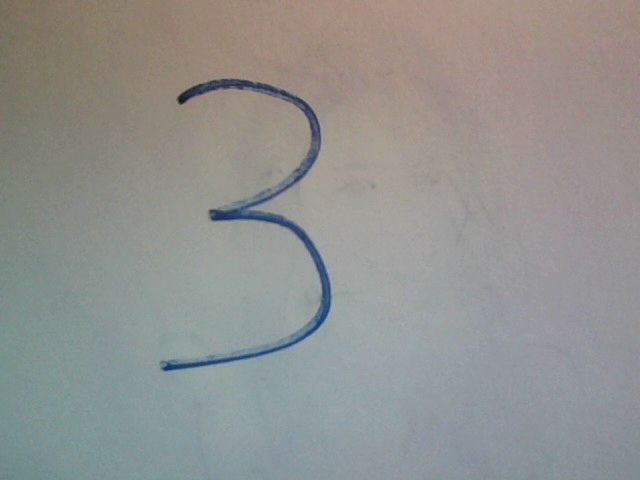

307200


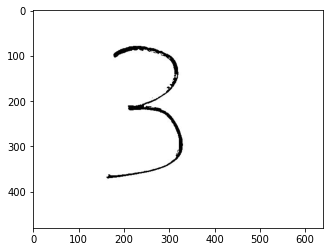

784


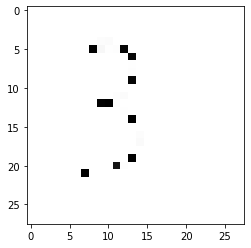

Probability Distribution for 0 0.0008499245
Probability Distribution for 1 1.8527807e-06
Probability Distribution for 2 0.00019211398
Probability Distribution for 3 0.9862142
Probability Distribution for 4 0.008718558
Probability Distribution for 5 2.559222e-05
Probability Distribution for 6 0.0033455098
Probability Distribution for 7 9.51103e-05
Probability Distribution for 8 0.00042343893
Probability Distribution for 9 0.00013373006
The Predicted Value is 3


In [20]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import matplotlib.pyplot as plt
import numpy as np

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

from PIL import Image
user_test = filename
col = Image.open(user_test)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<100 else 255, '1')
bw.save("bw_image.jpg")
bw
img_array = cv2.imread("bw_image.jpg", cv2.IMREAD_GRAYSCALE)
img_array = cv2.bitwise_not(img_array)
print(img_array.size)
plt.imshow(img_array, cmap = plt.cm.binary)
plt.show()
img_size = 28
new_array = cv2.resize(img_array, (img_size,img_size))
print(new_array.size)
plt.imshow(new_array, cmap = plt.cm.binary)
plt.show()
#user_test = tf.keras.utils.normalize(new_array, axis = 1)
user_test = new_array.reshape(new_array.shape[0], 1, 28, 1)
_user_test = user_test.astype('float32')

user_test=np.reshape(user_test,(1,28,28,1))
predicted = model.predict(user_test)
a = predicted[0][0]
for i in range(0,10):
  b = predicted[0][i]
  print("Probability Distribution for",i,b)

print("The Predicted Value is",np.argmax(predicted[0]))


# AS WE CAN SEE THE IMAGE TAKEN USING WEBCAM ,
WHICH WAS THEN RESIZED TO A SHAPE WHICH WAS FED TO OUR MODEL,THE OUTPUT WAS THE NUMBER WHICH HAD MAXIMUM PROBABILITY DISTRIBUTION. 